In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import numpy as np

2024-02-04 13:06:18.488187: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-04 13:06:18.801409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 13:06:18.801492: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 13:06:18.864943: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-04 13:06:18.996761: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-04 13:06:18.998719: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
# 1. Face detection
backends = ["opencv", "ssd", "dlib", "stcnn", "retinaface", "mediapipe"]

models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

# Analyze the image for facial attributes including landmarks


True

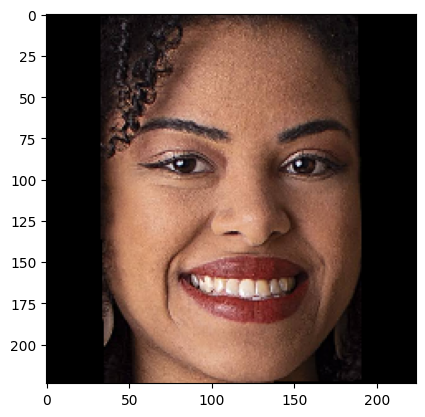

In [18]:
#face detection and alignment
face_objs = DeepFace.extract_faces(img_path = "ruany/7.jpg", 
        target_size = (224, 224), 
        detector_backend = backends[4]
)

face1 = face_objs[0]['face']
plt.imshow(face1)

# Convert the face to BGR color space (OpenCV uses BGR by default)
face_bgr = cv2.cvtColor(face1, cv2.COLOR_RGB2BGR)

# Normalize pixel values to the range [0, 255] for correct saving
face_normalized = (face_bgr * 255).astype(np.uint8)

# Save the face as an image file
cv2.imwrite("extracted_face.jpg", face_normalized)

In [19]:
face_objs

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

True

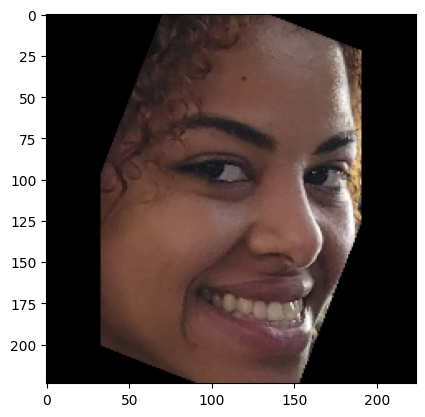

In [25]:
#face detection and alignment
face_objs = DeepFace.extract_faces(img_path = "ruany/4.jpg", 
        target_size = (224, 224), 
        detector_backend = backends[4]
)
face2 = face_objs[1]['face']
plt.imshow(face2)

# Convert the face to BGR color space (OpenCV uses BGR by default)
face_bgr = cv2.cvtColor(face2, cv2.COLOR_RGB2BGR)

# Normalize pixel values to the range [0, 255] for correct saving
face_normalized = (face_bgr * 255).astype(np.uint8)

# Save the face as an image file
cv2.imwrite("extracted_face2.jpg", face_normalized)

In [11]:
result = DeepFace.verify("extracted_face.jpg", "extracted_face2.jpg", model_name=models[0], enforce_detection=False)

24-02-04 13:13:21 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /home/elton/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [12:13<00:00, 791kB/s]  


## 1. Facial Symmetry Deviation:

Function: Quantify the deviation from perfect symmetry based on facial features.

Importance: Symmetry is often associated with attractiveness; this feature adds a nuanced layer to similarity assessments.

Standard Design: Calculate the differences between corresponding facial landmarks on the left and right sides.


In [21]:
def calculate_symmetry_deviation(face):
    # Assuming the input face is a NumPy array containing facial landmarks
    # Extract the left and right facial landmarks
    left_points = face[:, :len(face[0]) // 2]
    right_points = face[:, len(face[0]) // 2:]

    # Calculate the absolute differences between corresponding points
    differences = np.abs(left_points - np.flip(right_points, axis=1))  # Reverse the order of right points to match left points

    # Calculate the mean deviation
    symmetry_deviation = np.mean(differences)
    
    return symmetry_deviation

In [27]:
symmetry_deviation_1 = calculate_symmetry_deviation(face1)
print("Facial Symmetry Deviation for Face 1:", symmetry_deviation_1)

Facial Symmetry Deviation for Face 1: 0.11966735


In [123]:
symmetry_deviation_2 = calculate_symmetry_deviation(face2)
print("Facial Symmetry Deviation for Face 2:", symmetry_deviation_2)

Facial Symmetry Deviation for Face 2: 0.111546434


## 2. Composite Ratios:
Function: Combine multiple ratios (e.g., eye-to-nose ratio, mouth-to-facial width ratio) for a holistic facial profile.

Importance: Captures more comprehensive information about facial proportions and enhances similarity assessments.

Standard Design: Sum or average individual ratios, with appropriate weighting based on feature importance.


In [28]:
# Function to calculate composite ratio
def calculate_composite_ratio(eye_to_nose_ratio, mouth_to_facial_width_ratio):
    # Combine individual ratios using a weighted sum or any other method
    composite_ratio = 0.5 * eye_to_nose_ratio + 0.5 * mouth_to_facial_width_ratio
    
    return composite_ratio

# Example usage:
# Assuming you have calculated the individual ratios for a face
eye_to_nose_ratio = 0.7
mouth_to_facial_width_ratio = 0.6

# Calculate the composite ratio
composite_ratio = calculate_composite_ratio(eye_to_nose_ratio, mouth_to_facial_width_ratio)
print("Composite Ratio:", composite_ratio)

Composite Ratio: 0.6499999999999999


In [ ]:
landmarks

In [ ]:
# Function to calculate Facial Width-to-Height Ratio (FWHR)
def calculate_fwhr(landmarks):
    # Extract landmarks
    left_cheekbone = landmarks[0]  # e.g., cheekbone on the left side
    right_cheekbone = landmarks[16]  # e.g., cheekbone on the right side
    upper_lip = landmarks[51]  # e.g., upper lip
    mid_forehead = landmarks[27]  # e.g., midpoint of the forehead
    
    # Calculate distances
    cheekbone_distance = np.linalg.norm(left_cheekbone - right_cheekbone)
    upper_lip_to_forehead_distance = np.linalg.norm(upper_lip - mid_forehead)
    
    # Calculate FWHR ratio
    fwhr_ratio = cheekbone_distance / upper_lip_to_forehead_distance
    return fwhr_ratio

# Function to calculate Eye Width-to-Nose Width Ratio
def calculate_eye_to_nose_ratio(landmarks):
    # Extract landmarks
    left_eye_inner = landmarks[39]  # e.g., inner corner of the left eye
    right_eye_inner = landmarks[42]  # e.g., inner corner of the right eye
    nose_left = landmarks[31]  # e.g., left side of the nose
    nose_right = landmarks[35]  # e.g., right side of the nose
    
    # Calculate distances
    eye_distance = np.linalg.norm(left_eye_inner - right_eye_inner)
    nose_width = np.linalg.norm(nose_left - nose_right)
    
    # Calculate eye-to-nose ratio
    eye_to_nose_ratio = eye_distance / nose_width
    return eye_to_nose_ratio

# Function to calculate Nose-to-Chin Ratio
def calculate_nose_to_chin_ratio(landmarks):
    # Extract landmarks
    nose_bottom = landmarks[33]  # e.g., bottom of the nose
    chin = landmarks[8]  # e.g., chin
    
    # Calculate distance
    nose_to_chin_distance = np.linalg.norm(nose_bottom - chin)
    
    # Calculate nose-to-chin ratio
    nose_to_chin_ratio = nose_to_chin_distance / (max(landmarks[:, 1]) - min(landmarks[:, 1]))  # Facial height
    return nose_to_chin_ratio

# Function to calculate Cheekbone Prominence
def calculate_cheekbone_prominence(landmarks):
    # Extract landmarks
    left_eye_outer = landmarks[36]  # e.g., outer corner of the left eye
    right_eye_outer = landmarks[45]  # e.g., outer corner of the right eye
    left_cheekbone = landmarks[0]  # e.g., cheekbone on the left side
    right_cheekbone = landmarks[16]  # e.g., cheekbone on the right side
    
    # Calculate distances
    left_eye_to_cheekbone_distance = np.linalg.norm(left_eye_outer - left_cheekbone)
    right_eye_to_cheekbone_distance = np.linalg.norm(right_eye_outer - right_cheekbone)
    cheekbone_size = np.linalg.norm(left_cheekbone - right_cheekbone)
    
    # Calculate cheekbone prominence
    cheekbone_prominence = (left_eye_to_cheekbone_distance + right_eye_to_cheekbone_distance) / cheekbone_size
    return cheekbone_prominence

# Function to compute variability in distances between facial landmarks
def compute_landmark_variability(landmarks_list):
    # Convert list of landmarks to NumPy array for easier computation
    landmarks_array = np.array(landmarks_list)
    
    # Calculate pairwise Euclidean distances between all pairs of landmarks for each face
    pairwise_distances = np.linalg.norm(landmarks_array[:, :, np.newaxis, :] - landmarks_array[:, np.newaxis, :, :], axis=-1)
    
    # Compute the standard deviation of pairwise distances across all faces
    variability = np.std(pairwise_distances)
    return variability

# Example usage:
# Assume landmarks_list contains the landmarks for multiple faces, each represented as a 2D array of shape (num_landmarks, 2)
landmarks_list = [landmarks_face1, landmarks_face2, landmarks_face3]  # Replace with actual landmarks data
fwhr_values = [calculate_fwhr(landmarks) for landmarks in landmarks_list]
eye_to_nose_values = [calculate_eye_to_nose_ratio(landmarks) for landmarks in landmarks_list]
nose_to_chin_values = [calculate_nose_to_chin_ratio(landmarks) for landmarks in landmarks_list]
cheekbone_prominence_values = [calculate_cheekbone_prominence(landmarks) for landmarks in landmarks_list]

# Compute variability in distances between facial landmarks
variability = compute_landmark_variability(landmarks_list)
print("Facial Landmark Variability:", variability)